### Add scripts path to the notebook

In [1]:
import sys
import os

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\KifiyaAIM-Course\Week - 4\Rossman-Pharma-Sales-Prediction\notebooks


### Import Statements

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scripts.utils import config_logger, log_message

In [3]:
sns.set_theme()

Initialize custom logger

In [4]:
# config the logging file
config_logger(log_file='../eda_log.log')

### Load the data

Paths to the csv files

In [5]:
# path of the store data
STORE_PATH  = '../data/store.csv'

# path of the pre-compiled train data
TRAIN_PATH = '../data/train.csv'

# path of the pre-compiled test data
TEST_DATA = '../data/test.csv'

In [6]:
# load the store data
store_df = pd.read_csv(STORE_PATH)

# load the pre-compiled train data
train_pre_df = pd.read_csv(TRAIN_PATH)

# load the pre-compiled test data
test_pre_df = pd.read_csv(TEST_DATA)

C:\Users\VICTUS 16\AppData\Local\Temp\ipykernel_16396\4223236660.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_pre_df = pd.read_csv(TRAIN_PATH)


In [7]:
# log about logging the data
log_message(msg='Finished loading all the provided data')

2024-09-22 21:09:40,063 - INFO - Finished loading all the provided data


### Exploratory Data Analysis

**A general overview of the data provided**

In [8]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
train_pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


From the basic overview of the two datasets it is clear that:
* The data found in the _store.csv_ is a data about unique stores and it contains fields like corresponding stores assortment level, store type and competition distance
* The data found in the _train.csv_ is a data about the history of sales for each store. It contains valueable information such as the amount of customers, whether it was open or not, the amount of sales, and whether there was a promo that day or not 

In [10]:
log_message('Finished basic understanding of the datasets')

2024-09-22 21:09:40,259 - INFO - Finished basic understanding of the datasets


#### 1) **Perfom EDA on the Store Data**

- Basic statistical description

In [11]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


- Investigate missing data

In [12]:
store_df.isna().mean()

Store                        0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002691
CompetitionOpenSinceMonth    0.317489
CompetitionOpenSinceYear     0.317489
Promo2                       0.000000
Promo2SinceWeek              0.487892
Promo2SinceYear              0.487892
PromoInterval                0.487892
dtype: float64

In [13]:
train_pre_df.isna().mean()

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64

- **Competition Statistics** 

In [14]:
# Group the sales data by store id
store_sales_group = train_pre_df.groupby(by='Store')

In [15]:
# Aggregate the total sales for each store
store_tot_sales = store_sales_group.agg({
    'Sales': 'sum',
    'Customers' : 'sum'
})

Questions to be answered:
- How does the distance of competetors affect sales ?
- How does the opening or reopening of new competitors affect stores ?
- What can you say about the correlation between sales and the number of customers ?

In [16]:
# Perform an inner join on the 'Store' column
comp_dist_sale = pd.merge(store_tot_sales, store_df[['Store', 'CompetitionDistance', 'Assortment']], on='Store', how='inner')

In [17]:
# Assign numerical values to Assortment
# a = 1, b = 2, c = 3
comp_dist_sale['Assortment'] = comp_dist_sale['Assortment'].map({'a': 1, 'b': 2, 'c': 3})

In [18]:
# Find the correlation matrix
corr_matrix = comp_dist_sale.corr()

Find out the missing values

<Axes: >

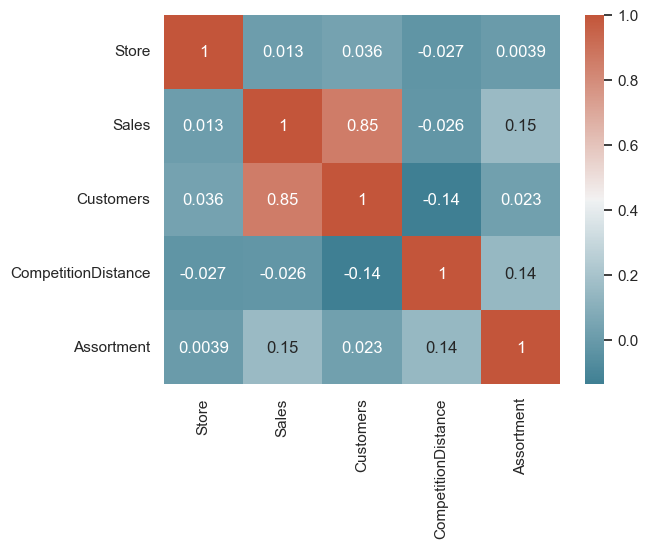

In [19]:
cmap = sns.diverging_palette(220 , 20 , as_cmap=True)
sns.heatmap(data=corr_matrix, cmap=cmap, annot=True)

- **Effect of promotion on sales**

In [20]:
# group data across
promo_grouping = train_pre_df.groupby(by='Promo')

# aggregate the data
promo_agg = promo_grouping.agg({
    'Sales': 'sum'
}).reset_index()

2024-09-22 21:12:20,041 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2024-09-22 21:12:20,059 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: ylabel='Sales'>

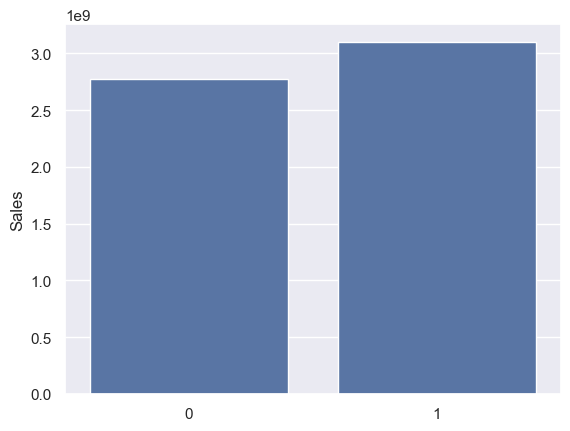

In [29]:
sns.barplot(promo_agg['Sales'])